# ANOMALY BASED INTRUSION DETECTION SYSTEM

## Importing Libraries

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

## Reading the Dataset

In [138]:
df=pd.read_csv('CIC-TON-IOT_sample_km.csv')

In [139]:
df.head()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
0,0.782100,-0.711809,-0.190351,-0.038855,-0.004282,-0.006171,-0.066885,-0.015793,-0.668197,-0.16137,-0.62351,-0.656582,-0.700536,-0.158308,-0.655204,-0.693585,-0.052081,0.0,-0.057386,-0.028087,-0.078697,-0.012863,-0.037765,-0.049457,-0.029877,-0.066622,-0.012861,-0.010193,-0.005703,-0.019347,-0.018662,0.00166,-0.072661,0.0,0.0,0.0,-0.008332,-0.009916,-0.161090,-0.169043,-0.238232,-0.758397,-0.694694,-0.724827,-0.604703,0.48426,-0.029653,-0.002794,-0.014171,-0.009958,0.0,-0.001513,-0.001513,-0.002412,-0.704704,-0.62351,-0.655204,0.0,0.0,0.0,-0.01946,-0.003679,-0.058269,1.837674,-0.589453,0.0,-0.615779,-0.808642,-0.266698,-0.006507,0.833328,-0.052429,-0.036881,-0.04896,-0.040843,0.298226,-0.300642,-0.015761,0.303116,0.941664,9
1,0.881579,-0.711809,-0.190351,-0.038851,-0.004282,-0.006171,-0.066885,-0.015793,-0.668197,-0.16137,-0.62351,-0.656582,-0.700536,-0.158308,-0.655204,-0.693585,-0.052081,0.0,-0.057375,-0.028087,-0.078687,-0.012859,-0.037761,-0.049448,-0.029877,-0.066613,-0.012857,-0.010193,-0.005703,-0.019347,-0.018662,0.00166,-0.072661,0.0,0.0,0.0,-0.008332,-0.009916,-0.191120,-0.169043,-0.238232,-0.758397,-0.694694,-0.724827,-0.604703,0.48426,-0.029653,-0.002794,-0.014171,-0.009958,0.0,-0.001513,-0.001513,-0.002412,-0.704704,-0.62351,-0.655204,0.0,0.0,0.0,-0.01946,-0.003679,-0.058269,1.837674,-0.589453,0.0,-0.615779,-0.808108,-0.266698,-0.006507,0.833328,-0.052429,-0.036881,-0.04896,-0.040843,0.298260,-0.300642,0.084422,0.303135,0.941664,9
2,0.766808,-0.711809,-0.190351,-0.038855,-0.004282,-0.006171,-0.066885,-0.015793,-0.668197,-0.16137,-0.62351,-0.656582,-0.700536,-0.158308,-0.655204,-0.693585,-0.052081,0.0,-0.057386,-0.028087,-0.078697,-0.012863,-0.037765,-0.049457,-0.029877,-0.066622,-0.012861,-0.010193,-0.005703,-0.019347,-0.018662,0.00166,-0.072661,0.0,0.0,0.0,-0.008332,-0.009916,-0.159845,-0.169043,-0.238232,-0.758397,-0.694694,-0.724827,-0.604703,0.48426,-0.029653,-0.002794,-0.014171,-0.009958,0.0,-0.001513,-0.001513,-0.002412,-0.704704,-0.62351,-0.655204,0.0,0.0,0.0,-0.01946,-0.003679,-0.058269,1.837674,-0.589453,0.0,-0.615779,-0.808108,-0.266698,-0.006507,0.833328,-0.052429,-0.036881,-0.04896,-0.040843,0.298258,-0.300642,0.076361,0.303134,0.941664,9
3,0.874432,-0.711809,-0.190351,-0.038855,-0.004282,-0.006171,-0.066885,-0.015793,-0.668197,-0.16137,-0.62351,-0.656582,-0.700536,-0.158308,-0.655204,-0.693585,-0.052081,0.0,-0.057384,-0.028087,-0.078695,-0.012862,-0.037764,-0.049455,-0.029877,-0.066620,-0.012860,-0.010193,-0.005703,-0.019347,-0.018662,0.00166,-0.072661,0.0,0.0,0.0,-0.008332,-0.009916,-0.173381,-0.169043,-0.238232,-0.758397,-0.694694,-0.724827,-0.604703,0.48426,-0.029653,-0.002794,-0.014171,-0.009958,0.0,-0.001513,-0.001513,-0.002412,-0.704704,-0.62351,-0.655204,0.0,0.0,0.0,-0.01946,-0.003679,-0.058269,1.837674,-0.589453,0.0,-0.615779,-0.808108,-0.266698,-0.006507,0.833328,-0.052429,-0.036881,-0.04896,-0.040843,0.298242,-0.300642

In [140]:
df.shape

(43680, 81)

### Removing the data samples with label as 7 (assuming it to be zero day attack) and an equal number of Benign Samples for the evalutaion.

#### new_df will be formed with such data

In [141]:
# Filter the points with Attack column value as 7
attack_7_df = df[df['Attack'] == 7]

# Sample an equal number of points with Attack column value as 0
attack_0_df = df[df['Attack'] == 0].sample(n=len(attack_7_df), random_state=42)

# Concatenate the filtered DataFrames
new_df = pd.concat([attack_7_df, attack_0_df], ignore_index=True)

In [142]:
new_df.shape

(72, 81)

In [143]:
new_df.Attack.value_counts()

Attack
7    36
0    36
Name: count, dtype: int64

#### All the values having attack value as 7 are changed to value 1, meaning it is an attack

In [144]:
new_df.loc[new_df['Attack'] == 7, 'Attack'] = 1

In [145]:
new_df.Attack.value_counts()

Attack
1    36
0    36
Name: count, dtype: int64

In [146]:
df.Attack.value_counts()

Attack
0    20121
9    17137
6     2742
4     2257
5      517
8      314
1      209
2      202
3      145
7       36
Name: count, dtype: int64

### Removing attack with label 7 from the dataset

In [147]:
df = df[df['Attack'] != 7]

### Assigning all the attack values as 1 only. Now 1 represents attack and 0 represents Benign

In [148]:
df['Attack'][df['Attack'] > 0] = 1

### Applying normalization to the data

In [149]:
features = df.drop(['Attack'],axis=1).dtypes.index

In [150]:
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))

### Filling empty values with 0

In [151]:
df = df.fillna(0)

### Partitioning data into x and y

In [152]:
y = df.iloc[:, -1].values.reshape(-1,1)
X = df.drop(['Attack'],axis=1).values
y=np.ravel(y)

## Feature selection using Information Gain

In [153]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y)

In [154]:
features = new_df.dtypes.index

In [155]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [156]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.44:
        break        

In [157]:
x_test = new_df[fs].values

In [158]:
X_train = df[fs].values

In [159]:
y_test = new_df['Attack']

In [160]:
y_train = y[:len(df)]

### Creating train and test data

In [161]:
X_train1 = X_train[:len(df)]
y_train1 = y[:len(df)]
X_test1 = x_test
y_test1 = y_test

## Using WCSS for finding best value of K

In [162]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn import metrics

In [163]:
# finding wcss values for different number of clusters
wcss = []
for i in range(1, 50): 
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
  kmeans.fit(X_train1)
  wcss.append(kmeans.inertia_)

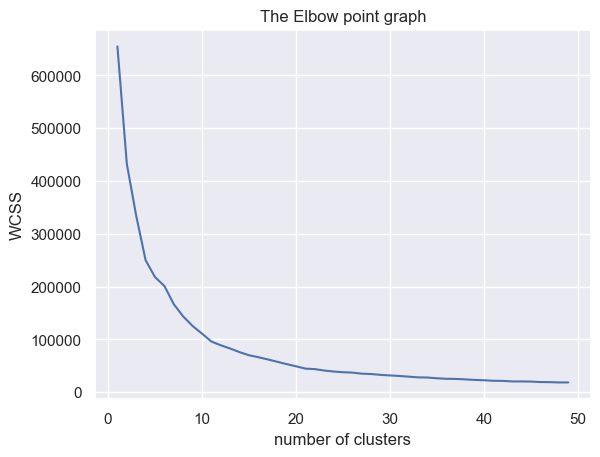

In [164]:
sns.set()
plt.plot(range(1, 50), wcss)
plt.title('The Elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

## Using Silhoutte Score for finding best value of K

In [165]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [166]:
ssd =[]

for k in range(2,50):
    model = KMeans(n_clusters=k)
    model.fit(X_train1)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_train1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4961532957974374
Silhouette Score for 3 clusters: 0.4957840346695176
Silhouette Score for 4 clusters: 0.48031767130507347
Silhouette Score for 5 clusters: 0.48221087083744824
Silhouette Score for 6 clusters: 0.4931015755929469
Silhouette Score for 7 clusters: 0.48341686023582703
Silhouette Score for 8 clusters: 0.4999939331998185
Silhouette Score for 9 clusters: 0.5064248095771253
Silhouette Score for 10 clusters: 0.5389385046052286
Silhouette Score for 11 clusters: 0.5389602765058592
Silhouette Score for 12 clusters: 0.5410546018975302
Silhouette Score for 13 clusters: 0.5344847851454217
Silhouette Score for 14 clusters: 0.5418285238818642
Silhouette Score for 15 clusters: 0.5481781103124721
Silhouette Score for 16 clusters: 0.5386713010264019
Silhouette Score for 17 clusters: 0.5855093418756775
Silhouette Score for 18 clusters: 0.5886192863947203
Silhouette Score for 19 clusters: 0.5950344065296072
Silhouette Score for 20 clusters: 0.577395106497247

In [167]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
import time

def CL_kmeans(X_train1, X_test1, y_train1, y_test1, n, b=100):
    start_time = time.time()

    km_cluster = MiniBatchKMeans(n_clusters=n, batch_size=b)
    result = km_cluster.fit_predict(X_train1)
    result2 = km_cluster.predict(X_test1)

    cluster_creation_time = time.time() - start_time

    count = 0
    a = np.zeros(n)  # a[i] is normal samples in cluster i
    count_b = np.zeros(n)
    for v in range(0, n):
        for i in range(0, len(y_train1)):
            if result[i] == v:
                if y_train1[i] == 1:  # sample is an attack
                    a[v] = a[v] + 1
                else:
                    count_b[v] = count_b[v] + 1

    list1 = []  # normal cluster
    list2 = []  # attack cluster
    for v in range(0, n):
        if a[v] <= count_b[v]:
            list1.append(v)
        else:
            list2.append(v)

    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    for v in range(0, len(y_test1)):
        if result2[v] in list1:
            result2[v] = 0
        elif result2[v] in list2:
            result2[v] = 1
        else:
            print("-1")

        if y_test1[v] == 1 and result2[v] == 1:
            true_positives += 1
        elif y_test1[v] == 0 and result2[v] == 1:
            false_positives += 1
        elif y_test1[v] == 0 and result2[v] == 0:
            true_negatives += 1
        elif y_test1[v] == 1 and result2[v] == 0:
            false_negatives += 1

    print("True Positives:", true_positives)
    print("False Positives:", false_positives)
    print("True Negatives:", true_negatives)
    print("False Negatives:", false_negatives)

    print(classification_report(y_test1, result2))
    cm = confusion_matrix(y_test1, result2)
    acc = metrics.accuracy_score(y_test1, result2)
    print(str(acc))
    print(cm)

    classification_time = time.time() - cluster_creation_time - start_time
    print("Cluster Creation Time:", cluster_creation_time)
    print("Classification Time:", classification_time)

    cm_df = pd.DataFrame(
        [[true_negatives, false_positives], [false_negatives, true_positives]],
        index=["Actual 0", "Actual 1"],
        columns=["Predicted 0", "Predicted 1"],
    )

    # Plot the heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


True Positives: 34
False Positives: 0
True Negatives: 36
False Negatives: 2
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.94      0.97        36

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72

0.9722222222222222
[[36  0]
 [ 2 34]]
Cluster Creation Time: 0.16127562522888184
Classification Time: 0.3401179313659668


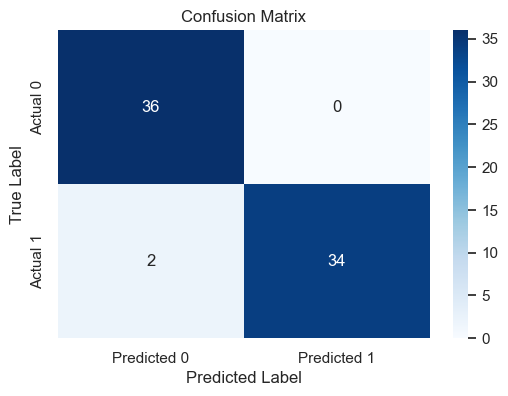

In [168]:
CL_kmeans(X_train1, X_test1, y_train1, y_test1, 17)